<a href="https://colab.research.google.com/github/cdiegor/MineracaoDeDados/blob/main/Spam%20Count%20Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtro de spam usando um classificador Naive Bayes

[original](https://www.kaggle.com/code/jeffysonar/spam-filter-using-naive-bayes-classifier)

**Importar bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Leitura do arquivo CSV**

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Mostrar o conjunto de dados e contagem de ham/spam**

In [ ]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

<Axes: xlabel='label', ylabel='count'>

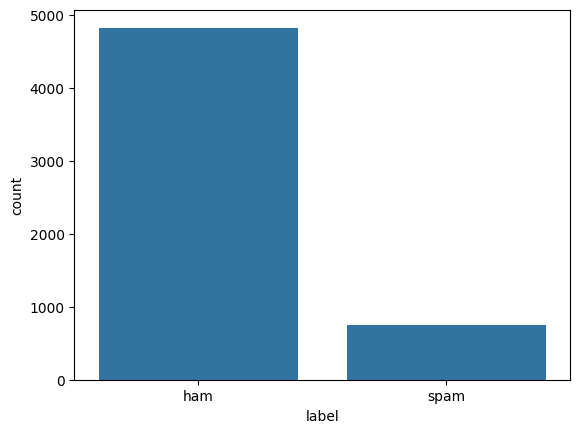

In [ ]:
sns.countplot(data=df, x='label')

**Passos para realizar o nosso filtro de spam:**

1. Limpar e normalizar o texto
2. Converter o texto em vetores de palavras (utilizando o modelo *bag of words*) para que os modelos de aprendizado consigam entender.
3. Treinar e testar o classificador.

**Limpando e normalizando o texto**
1. Remover pontuação
2. Remover *stopwords*
3. Aplicar [stemming](https://en.wikipedia.org/wiki/Stemming) (extrair a raiz das palavras).

** Método process recebe um texto e aplica os passos 1, 2 e 3, retornando uma string que consiste na lista de palavras restantes.**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def process(text):
    # Caixa baixa
    text = text.lower()
    # Remover a pontuação
    text = ''.join([t for t in text if t not in string.punctuation])
    # Remover as stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # Raiz das palavras
    st = Stemmer()
    text = [st.stem(t) for t in text]
    # Retornar o texto modificado
    return text

In [ ]:
# Testando
process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!')

['holiday', 'play', 'cricket', 'jeff', 'play', 'well']

In [ ]:
# Testando no conjunto de dados
df['message'][:20].apply(process)

,message
0,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,"[ok, lar, joke, wif, u, oni]"
2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"[nah, dont, think, goe, usf, live, around, tho..."
5,"[freemsg, hey, darl, 3, week, word, back, id, ..."
6,"[even, brother, like, speak, treat, like, aid,..."
7,"[per, request, mell, mell, oru, minnaminungint..."
8,"[winner, valu, network, custom, select, receiv..."
9,"[mobil, 11, month, u, r, entitl, updat, latest..."


**Tendo mensagens em forma de vetores, estamos prontos para treinar nosso classificador. Usaremos o Naive Bayes, que é um classificador bem conhecido ao trabalhar com dados de texto. Antes disso, usaremos o recurso de pipeline do sklearn para criar um pipeline do CountVectorizer seguido pelo Multinomial Naive Bayes.**

A entrada será uma mensagem passada para o primeiro estágio TfidfVectorizer, que a transformará e a passará para o Naive Bayes Classifier para obter o rótulo de saída

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

spam_filter = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=process)), # mensagens convertidas com scores de contagem
    ('classifier', MultinomialNB())                    # treinamento com os dados do tf-idf
])

**Fazer a divisão entre treinamento e teste**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.20, random_state = 21)

**Treinar o spam_filter**

In [ ]:
spam_filter.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(analyzer=<function process at 0x79bde35ceb90>)),
                ('classifier', MultinomialNB())])

**Predição para casos de teste**

In [ ]:
predictions = spam_filter.predict(x_test)

In [ ]:
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Número total de testes', len(y_test))
print('Número de erros', count)

Número total de testes 1115
Número de erros 19


**Checar quais foram os erros nas predições**

In [ ]:
x_test[y_test != predictions]

,message
419,Send a logo 2 ur lover - 2 names joined by a h...
3139,sexy sexy cum and text me im wet and warm and ...
3790,"Twinks, bears, scallies, skins and jocks are c..."
2877,Hey Boys. Want hot XXX pics sent direct 2 ur p...
2377,YES! The only place in town to meet exciting a...
1499,"SMS. ac JSco: Energy is high, but u may not kn..."
3417,LIFE has never been this much fun and great un...
3358,Sorry I missed your call let's talk when you h...
2412,I don't know u and u don't know me. Send CHAT ...
3862,Oh my god! I've found your number again! I'm s...


**Utilizar a função report para melhores detalhes**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       978
        spam       0.92      0.94      0.93       137

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Olhando para a coluna de precisão (para ham, é 0,99), podemos dizer que quase todo o número de previsões erradas veio de spam previsto como ham. Está tudo bem e o custo de prever spam como ham é significativamente menor comparado com o de prever ham como spam.

**Função para dizer se uma mensagem é ham ou spam**

In [ ]:
def detect_spam(s):
    return spam_filter.predict([s])[0]
detect_spam('Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600.')

'spam'